In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# **Dataset Housing Boston**

## **No.1 membandingkan hasil linearregression yang berbeda proses preprosesing**

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/BCML/datasets/housing.csv')

dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [ ]:
dataset.corr()['medv'][:-1]

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
b          0.333461
lstat     -0.737663
Name: medv, dtype: float64

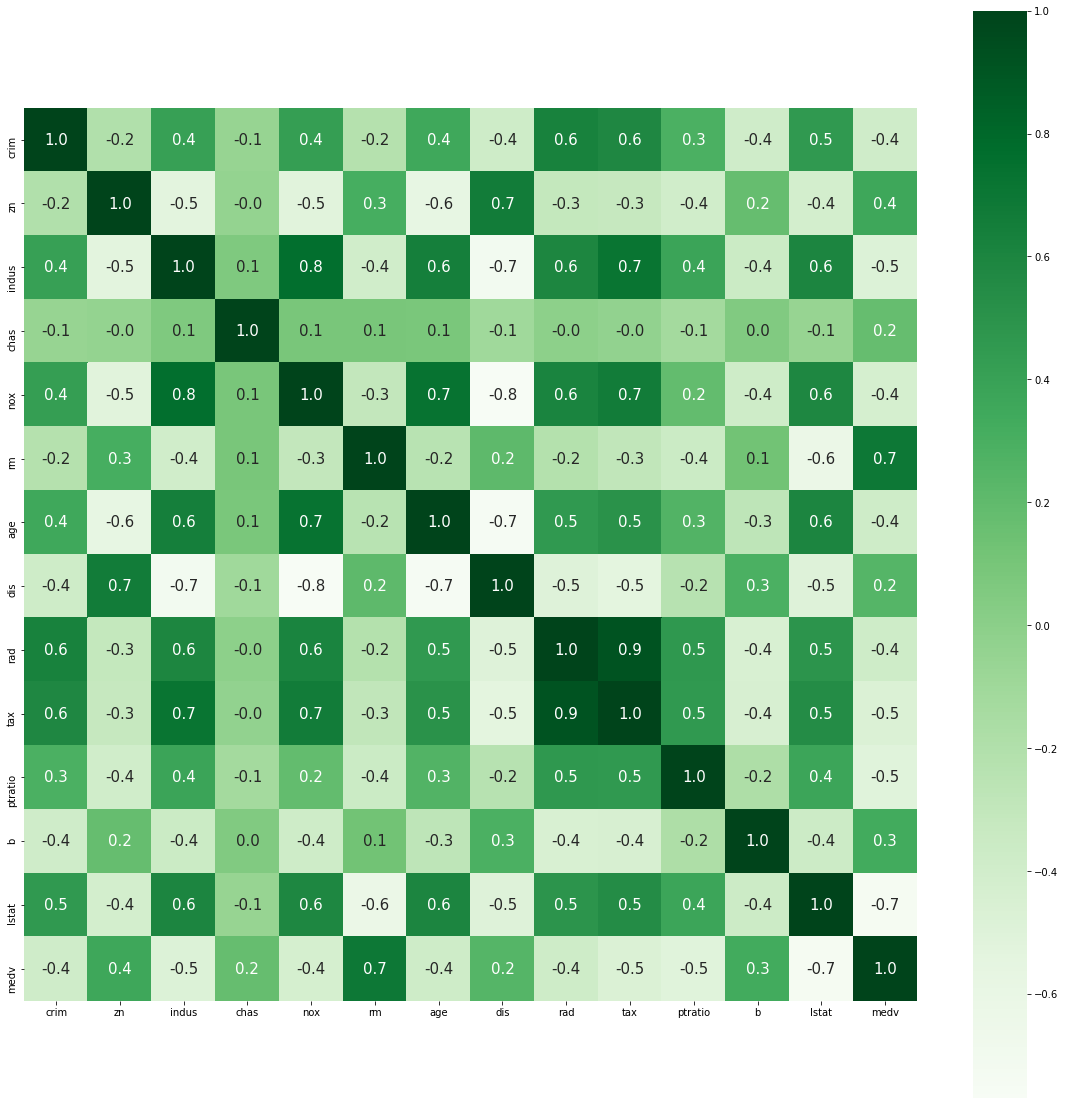

In [ ]:
corr = dataset.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

### **Standart Scaler**

In [ ]:
scaler = preprocessing.StandardScaler()
feature_used= dataset.drop(['medv'],axis=1)
label = dataset['medv']

feature_scaled =scaler.fit_transform(feature_used.values)
feature_train, feature_test,label_train, label_test = train_test_split(feature_scaled, label, test_size=0.25,random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Linear_reg = LinearRegression()
Linear_reg.fit(feature_train, label_train)
predictions = Linear_reg.predict(feature_test)

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 32.44253669600677
MAE (Mean Absolute Error) 3.857300907995511
r^2 score 0.67455850659494
RMSE (Root Mean Squared Error 5.695835030617264


### **Power Transformer Yeo-Johnson**

In [ ]:
from sklearn.preprocessing import PowerTransformer

PT_yeo = preprocessing.PowerTransformer(method='yeo-johnson')
feature_used= dataset.drop(['medv'],axis=1)
label = dataset['medv']

feature_scaled =PT_yeo.fit_transform(feature_used.values)
feature_train, feature_test,label_train, label_test = train_test_split(feature_scaled, label, test_size=0.25,random_state=10)

In [ ]:
Linear_reg = LinearRegression()
Linear_reg.fit(feature_train, label_train)
predictions = Linear_reg.predict(feature_test)

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 25.3744335774946
MAE (Mean Absolute Error) 3.626716061802263
r^2 score 0.7454609164768617
RMSE (Root Mean Squared Error 5.0373041974348345


### **Power Transformer Box-Cox**

In [ ]:
for index in range(len(dataset)):
  if dataset.loc[index,'medv'] <= 0:
    print('ada')
# zn chas

In [ ]:
PT_box = preprocessing.PowerTransformer(method='box-cox')
feature_used= dataset.drop(['zn','chas','medv'],axis=1)
label = dataset['medv']

feature_scaled =PT_box.fit_transform(feature_used.values)
feature_train, feature_test,label_train, label_test = train_test_split(feature_scaled, label, test_size=0.25,random_state=10)

In [ ]:
Linear_reg = LinearRegression()
Linear_reg.fit(feature_train, label_train)
predictions = Linear_reg.predict(feature_test)

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 26.094762040514823
MAE (Mean Absolute Error) 3.6515378713366418
r^2 score 0.7382350705775698
RMSE (Root Mean Squared Error 5.108303244768739


### **Quantile Transformer**

In [ ]:
from sklearn.preprocessing import QuantileTransformer

QT = preprocessing.QuantileTransformer(n_quantiles=100, random_state=1)
feature_used= dataset.drop(['medv'],axis=1)
label = dataset['medv']

feature_scaled =QT.fit_transform(feature_used.values)
feature_train, feature_test,label_train, label_test = train_test_split(feature_scaled, label, test_size=0.25,random_state=10)

In [ ]:
Linear_reg = LinearRegression()
Linear_reg.fit(feature_train, label_train)
predictions = Linear_reg.predict(feature_test)

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 29.52190548911803
MAE (Mean Absolute Error) 4.0297284379535725
r^2 score 0.703856295191486
RMSE (Root Mean Squared Error 5.433406435112142


### **MinMaxScaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

MMS = preprocessing.MinMaxScaler()
feature_used= dataset.drop(['medv'],axis=1)
label = dataset['medv']

feature_scaled =MMS.fit_transform(feature_used.values)
feature_train, feature_test,label_train, label_test = train_test_split(feature_scaled, label, test_size=0.25,random_state=10)

In [ ]:
Linear_reg = LinearRegression()
Linear_reg.fit(feature_train, label_train)
predictions = Linear_reg.predict(feature_test)

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 32.442536696006755
MAE (Mean Absolute Error) 3.8573009079955063
r^2 score 0.6745585065949401
RMSE (Root Mean Squared Error 5.695835030617263


### **MaxAbsScaler**

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

MAS = preprocessing.MaxAbsScaler()
feature_used= dataset.drop(['medv'],axis=1)
label = dataset['medv']

feature_scaled =MAS.fit_transform(feature_used.values)
feature_train, feature_test,label_train, label_test = train_test_split(feature_scaled, label, test_size=0.25,random_state=10)

In [ ]:
Linear_reg = LinearRegression()
Linear_reg.fit(feature_train, label_train)
predictions = Linear_reg.predict(feature_test)

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 32.44253669600672
MAE (Mean Absolute Error) 3.85730090799552
r^2 score 0.6745585065949404
RMSE (Root Mean Squared Error 5.69583503061726


### **Robust Scaler**

In [ ]:
from sklearn.preprocessing import RobustScaler


RS = preprocessing.RobustScaler()
feature_used= dataset.drop(['medv'],axis=1)
label = dataset['medv']

feature_scaled =RS.fit_transform(feature_used.values)
feature_train, feature_test,label_train, label_test = train_test_split(feature_scaled, label, test_size=0.25,random_state=10)

In [ ]:
Linear_reg = LinearRegression()
Linear_reg.fit(feature_train, label_train)
predictions = Linear_reg.predict(feature_test)

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 32.44253669600672
MAE (Mean Absolute Error) 3.857300907995508
r^2 score 0.6745585065949404
RMSE (Root Mean Squared Error 5.69583503061726


### **Kesimpulan**


standartscaler
r^2 score 0.67455850659494
RMSE (Root Mean Squared Error) 5.695835030617264

power transformer yeo-johnson
r^2 score 0.7454609164768617
RMSE (Root Mean Squared Error) 5.0373041974348345

powertransformer box-cox
r^2 score 0.7382350705775698
RMSE (Root Mean Squared Error) 5.108303244768739

quantile transformer
r^2 score 0.703856295191486
RMSE (Root Mean Squared Error) 5.433406435112142

minmaxscaler
r^2 score 0.6745585065949401
RMSE (Root Mean Squared Error) 5.695835030617263

maxabsscaler
r^2 score 0.6745585065949404
RMSE (Root Mean Squared Error) 5.69583503061726

robustscaler
r^2 score 0.6745585065949404
RMSE (Root Mean Squared Error) 5.69583503061726


**Berdasarkan hasil di atas bisa di lihat bahwa power transformer method yeo-johnson memiliki nilai akurasi tertinggi untuk algoritma linear regression ini terjadi karena power transformer mengubah atau menormalkan data menjadi kurva gausian yang lebih baik.**

## **No. 2 membandingkan hasil r2_score dengan berbagai algoritma**

In [ ]:
PT_yeo = preprocessing.PowerTransformer(method='yeo-johnson')
feature_used= dataset.drop(['medv'],axis=1)
label = dataset['medv']

feature_scaled =PT_yeo.fit_transform(feature_used.values)
feature_train, feature_test,label_train, label_test = train_test_split(feature_scaled, label, test_size=0.25,random_state=10)

### **Random Forest Regressor**

MSE (Mean Squared Error) 13.357668708661409
MAE (Mean Absolute Error) 2.5703149606299207
r^2 score 0.8660049399438028
RMSE (Root Mean Squared Error 3.6548144561196825


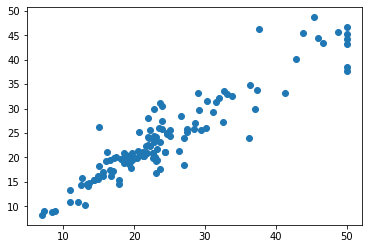

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RandomForest_reg = RandomForestRegressor(max_depth=100, random_state=10)
RandomForest_reg.fit(feature_train, label_train)
predictions = RandomForest_reg.predict(feature_test)

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))
plt.scatter(label_test, predictions)

### **XGBoost Regressor**

MSE (Mean Squared Error) 10.341363249936744
MAE (Mean Absolute Error) 2.35166430210504
r^2 score 0.8962624676535276
RMSE (Root Mean Squared Error 3.2157990064580755


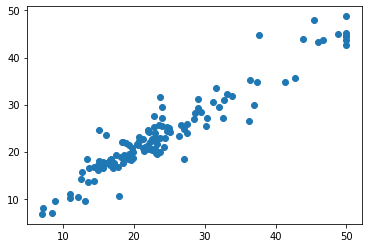

In [ ]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(max_depth=3,n_estimators=125,colsample_bytree=1,learning_rate=0.27,objective='reg:squarederror')
xgb_reg.fit(feature_train, label_train)
predictions = xgb_reg.predict(feature_test)

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))
plt.scatter(label_test, predictions)

### **SVM Regressor**

MSE (Mean Squared Error) = 30.98534757421151 kernel=linear
MAE (Mean Absolute Error) = 3.718253640630241 kernel=linear
r^2 score  = 0.6891760381527922 kernel=linear
RMSE (Root Mean Squared Error = 5.566448380629385 kernel=linear 

MSE (Mean Squared Error) = 37.83332363591566 kernel=poly
MAE (Mean Absolute Error) = 3.9346973683899784 kernel=poly
r^2 score  = 0.620481793396111 kernel=poly
RMSE (Root Mean Squared Error = 6.15087990745354 kernel=poly 

MSE (Mean Squared Error) = 42.783407840231995 kernel=rbf
MAE (Mean Absolute Error) = 3.920646095040855 kernel=rbf
r^2 score  = 0.570825910718731 kernel=rbf
RMSE (Root Mean Squared Error = 6.540902677783243 kernel=rbf 

MSE (Mean Squared Error) = 51.14224123565428 kernel=sigmoid
MAE (Mean Absolute Error) = 5.333987994795184 kernel=sigmoid
r^2 score  = 0.4869757713532371 kernel=sigmoid
RMSE (Root Mean Squared Error = 7.151380372743033 kernel=sigmoid 



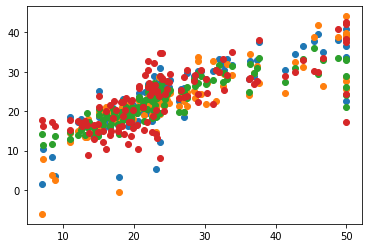

In [ ]:
from sklearn.svm import SVR
kernel=['linear', 'poly', 'rbf', 'sigmoid']
for index,value in enumerate(kernel):
  reggression = SVR(kernel=value)
  reggression.fit(feature_train, label_train)
  predictions = reggression.predict(feature_test)

  mse = mean_squared_error(label_test, predictions)
  mae = mean_absolute_error(label_test, predictions)
  r2 = r2_score(label_test, predictions)
  print("MSE (Mean Squared Error) = {} kernel={}".format(mse,value))
  print("MAE (Mean Absolute Error) = {} kernel={}".format(mae,value))
  print("r^2 score  = {} kernel={}".format(r2,value))
  print('RMSE (Root Mean Squared Error = {} kernel={} \n'.format(np.sqrt(mean_squared_error(label_test, predictions)),value))
  plt.scatter(label_test, predictions)

### **KNN Regressor**

MSE (Mean Squared Error) = 27.495826771653544 n_neighbors=1
MAE (Mean Absolute Error) = 3.2685039370078734 n_neighbors=1
r^2 score  = 0.7241805407875158 n_neighbors=1
RMSE (Root Mean Squared Error = 5.24364632404337 n_neighbors=1 

MSE (Mean Squared Error) = 25.737454068241462 n_neighbors=3
MAE (Mean Absolute Error) = 3.2737532808398955 n_neighbors=3
r^2 score  = 0.7418193414745027 n_neighbors=3
RMSE (Root Mean Squared Error = 5.073209444547057 n_neighbors=3 

MSE (Mean Squared Error) = 29.213483464566924 n_neighbors=5
MAE (Mean Absolute Error) = 3.4814173228346452 n_neighbors=5
r^2 score  = 0.7069501754638409 n_neighbors=5
RMSE (Root Mean Squared Error = 5.4049499039831 n_neighbors=5 

MSE (Mean Squared Error) = 29.639472923027473 n_neighbors=7
MAE (Mean Absolute Error) = 3.456467941507311 n_neighbors=7
r^2 score  = 0.7026769385454319 n_neighbors=7
RMSE (Root Mean Squared Error = 5.44421462867028 n_neighbors=7 

MSE (Mean Squared Error) = 28.70564790512297 n_neighbors=9
MAE (Mean Abso

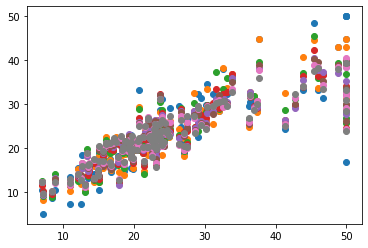

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

n=[1,3,5,7,9,11,13,15]
for index,value in enumerate(n):
  reggression = KNeighborsRegressor(n_neighbors=value)
  reggression.fit(feature_train, label_train)
  predictions = reggression.predict(feature_test)

  mse = mean_squared_error(label_test, predictions)
  mae = mean_absolute_error(label_test, predictions)
  r2 = r2_score(label_test, predictions)
  print("MSE (Mean Squared Error) = {} n_neighbors={}".format(mse,value))
  print("MAE (Mean Absolute Error) = {} n_neighbors={}".format(mae,value))
  print("r^2 score  = {} n_neighbors={}".format(r2,value))
  print('RMSE (Root Mean Squared Error = {} n_neighbors={} \n'.format(np.sqrt(mean_squared_error(label_test, predictions)),value))
  plt.scatter(label_test, predictions)

### **Kesimpulan**

Berdasarkan hasil diatas dapat di simpulkan bahwa XGBoost memiliki nilai r^2score dan rmse terbaik di bandingkan yang lain.